#  Exercicios

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn import metrics as mt
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams["figure.figsize"] = (20,10)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [3]:
data = pd.read_csv( 'dataset/train.csv' )

## 1. Rafaça o código de treinamento da aula 19: “Linear Regression - Prática” no seu computador usando o Jupyter Notebook ou o Google Colabs e compute o R2, o MSE e o RMSE

In [4]:
# Load dataset
df = data.copy()
# Seleção de Features
# Características
features = ['idade', 'divida_atual', 'renda_anual', 'valor_em_investimentos', 
            'taxa_utilizacao_credito', 'num_emprestimos', 'num_contas_bancarias', 'num_cartoes_credito', 
            'dias_atraso_dt_venc', 'num_pgtos_atrasados', 'num_consultas_credito', 'taxa_juros']

# Variável alvo
label = ['saldo_atual']

# Dados de treinamento e teste
x_train = df.loc[:, features]
y_train = df.loc[:, label]

# Treinamento do algoritmo
lr_model = LinearRegression()
lr_model.fit( x_train, y_train )

# Previsão do algoritmo
y_pred = lr_model.predict( x_train )

# Resultado final
df1 = df.loc[:, ['id_cliente', 'saldo_atual']]
df1['predicted'] = y_pred

df1.head()

,id_cliente,saldo_atual,predicted
0,1767,278.17,346.67
1,11920,268.87,367.84
2,8910,446.64,431.47
3,4964,321.14,445.51
4,10100,428.72,378.27


#### Função criada para retornar as métricas

In [5]:
def regression_metrics(y_train, y_pred, outlier):
    r2 = mt.r2_score(y_train, y_pred)
    mse = mt.mean_squared_error(y_train, y_pred)
    rmse = np.sqrt(mse)
    
    metrics = pd.DataFrame({'outliers': [outlier], 'r2': [r2], 'mse': [mse], 'rmse': [rmse]})
        
    return metrics

In [6]:
regression_metrics(y_train, y_pred, 0)

,outliers,r2,mse,rmse
0,0,0.17,39370.27,198.42


## 2. Qual o problema principal de usar a métrica MSE? Escreve um exemplo hipotético, no qual o problema acontece.

### <span style='color:red'> - Esta pergunta é de cunho interpretativo de cada aluno. </span>

## 3. Explique com um pequeno texto ilustrando o benefício de usar a métrica RMSE.

### <span style='color:red'> - Esta pergunta é de cunho interpretativo de cada aluno. </span>

## 4. Modifique 5% das linhas de algumas colunas, adicionando outliers e refaça as métricas de R2, MSE e RMSE.

In [7]:
percentual = 0.05
features = ['idade', 'divida_atual', 'renda_anual']
peso = 10

In [8]:
X_train2 = x_train.copy()

In [9]:
random_index = np.random.randint(1,X_train2.shape[0], int(X_train2.shape[0]*percentual))

In [10]:
np.round(X_train2[features].describe().T)

,count,mean,std,min,25%,50%,75%,max
idade,9500.00,126.00,685.00,18.00,28.00,38.00,47.00,8598.00
divida_atual,9500.00,1437.00,1156.00,0.00,574.00,1176.00,1963.00,4998.00
renda_anual,9500.00,195037.00,1454274.00,10474.00,26208.00,45991.00,80450.00,23279658.00


In [11]:
X_train2.loc[random_index,features] = X_train2.loc[random_index,features]*peso

In [12]:
np.round(X_train2[features].describe().T)

,count,mean,std,min,25%,50%,75%,max
idade,9500.00,155.00,1039.00,18.00,29.00,39.00,49.00,59150.00
divida_atual,9500.00,2034.00,3745.00,0.00,606.00,1230.00,2202.00,49521.00
renda_anual,9500.00,266248.00,3146042.00,10474.00,26731.00,48554.00,89069.00,199778224.00


#### Função criada para gerar outliers

In [13]:
def random_outliers( df, percentual, features, peso, seed):
    np.random.seed(seed)
    random_index = np.random.randint(1,df.shape[0], int(df.shape[0]*percentual))
    df.loc[random_index,features] = df.loc[random_index,features]*peso
    
    return df

In [14]:
X_train3 = x_train.copy()

In [15]:
percentual = 0.05
features = ['idade', 'divida_atual', 'renda_anual']
peso = 10
seed = 25

In [16]:
X_train3 = random_outliers( X_train3, percentual, features, peso, seed)

In [17]:
y_pred3 = lr_model.predict( X_train3 )

In [18]:
regression_metrics(y_train, y_pred3, percentual)

,outliers,r2,mse,rmse
0,0.05,-0.21,57383.44,239.55


## 5. Faça a seguinte bateria de testes

### 5.1 Refaça o exercícios 4 com as seguintes quantidade de outliers: 2%, 5%, 10%, 20% e 30%.

#### Função criada para criar um dataframe com as métricas por percentual de outlier

In [19]:
def metricas_outliers(df, percentuais, features, peso, seed):
    result = pd.DataFrame({'outliers': [], 'r2': [], 'mse': [], 'rmse': []})
    for i in percentuais:
        data = df.copy()
        data = random_outliers( data, i, features, peso, seed)
        y_pred = lr_model.predict( data )
        
        metrics = regression_metrics(y_train, y_pred, i)
        
        result = pd.concat([result, metrics], axis=0)
    
    return np.round(result,2)
    

In [20]:
data = x_train.copy()
percentuais = [0.02, 0.05, 0.1, 0.2, 0.3]
features = ['idade', 'divida_atual', 'renda_anual']
peso = 10
seed = 25

In [21]:
metricas = metricas_outliers( data, percentuais, features, peso, seed)
metricas

,outliers,r2,mse,rmse
0,0.02,0.01,46824.20,216.39
0,0.05,-0.21,57383.44,239.55
0,0.10,-0.65,78260.97,279.75
0,0.20,-1.48,117463.42,342.73
0,0.30,-2.25,154104.91,392.56


### 5.3 Crie um tabela de comparação entre os resultados das 3 métricas ( r2, MSE e RMSE ) para cada uma das proporções de outliers ( 2%, 5%, 10%, 20% e 30% ) e responda as seguintes perguntas:
        

In [22]:
metricas

,outliers,r2,mse,rmse
0,0.02,0.01,46824.20,216.39
0,0.05,-0.21,57383.44,239.55
0,0.10,-0.65,78260.97,279.75
0,0.20,-1.48,117463.42,342.73
0,0.30,-2.25,154104.91,392.56


###  <span style='color:orange'> Esse grafico é apenas para ajudar na intepletação </span>

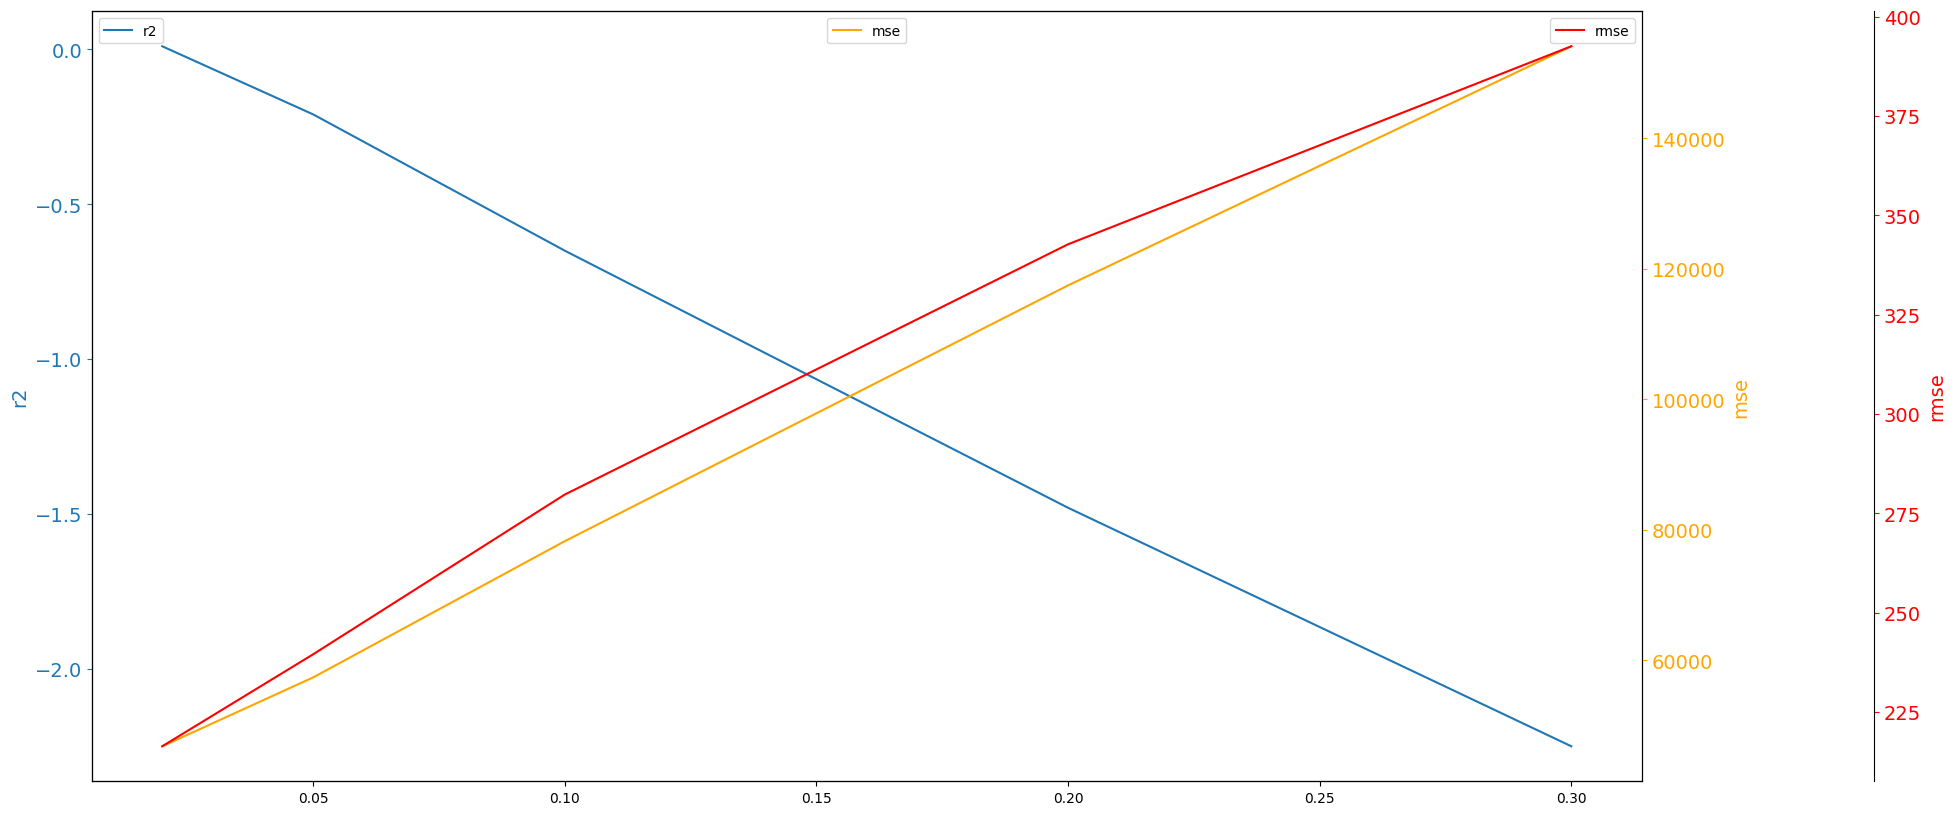

In [23]:
# Create figure and axis #1
fig, ax1 = plt.subplots()
# plot line chart on axis #1
p1, = ax1.plot(metricas.outliers, metricas.r2) 
ax1.set_ylabel('r2')
ax1.legend(['r2'], loc="upper left")
ax1.yaxis.label.set_color(p1.get_color())
ax1.yaxis.label.set_fontsize(14)
ax1.tick_params(axis='y', colors=p1.get_color(), labelsize=14)
# set up the 2nd axis
ax2 = ax1.twinx() 
# plot bar chart on axis #2
p2, = ax2.plot(metricas.outliers, metricas.mse, color='orange')
# ax2.grid(False) # turn off grid #2
ax2.set_ylabel('mse')
ax2.legend(['mse'], loc="upper center")
ax2.yaxis.label.set_color(p2.get_color())
ax2.yaxis.label.set_fontsize(14)
ax2.tick_params(axis='y', colors=p2.get_color(), labelsize=14)
# set up the 3rd axis
ax3 = ax1.twinx()
# Offset the right spine of ax3.  The ticks and label have already been placed on the right by twinx above.
ax3.spines.right.set_position(("axes", 1.15))
# Plot line chart on axis #3
p3, = ax3.plot(metricas.outliers, metricas.rmse, color='red')
ax3.set_ylabel('rmse')
ax3.legend(['rmse'], loc="upper right")
ax3.yaxis.label.set_color(p3.get_color())
ax3.yaxis.label.set_fontsize(14)
ax3.tick_params(axis='y', colors=p3.get_color(), labelsize=14)
plt.show()

#### - 5.4.1. Como as métricas R2, MSE e RMSE se comportam com a variação outliers no conjunto de dados?
        
        

#### <span style='color:red'> - Esta pergunta é de cunho interpretativo de cada aluno. </span>

#### - 5.4.2. Observando as respostas anteriores, quais são as ações que aumentam ou diminuem as métricas de “R2”, “MSE” ou “RMSE” de um problema de negócio?
        

#### <span style='color:red'> - Esta pergunta é de cunho interpretativo de cada aluno. </span>

### 5.4 Escreva um artigo para blog da Comunidade DS, descrevendo o seu aprendizado em relação ao comportamento das métricas, a partir dos seus experimentos com outliers presente nos dados.

#### <span style='color:red'> - Este exercicio é de cunho de cada aluno. </span>